In [130]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score, validation_curve, learning_curve
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.feature_selection import SelectKBest, chi2

import warnings
warnings.filterwarnings("ignore")

In [99]:
train = pd.read_csv('train.csv')

In [100]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [101]:
print("dataset size",train.shape)

dataset size (1460, 81)


In [102]:
dict(train.isnull().sum())

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'Alley': 1369,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fir

# Data wrangling

In [103]:
#we are going to drop columns with many missing values
train = train.drop('Alley', axis = 1).drop('FireplaceQu', axis = 1).drop('MiscFeature', axis = 1).drop('Fence', axis = 1).drop('PoolQC', axis = 1)

In [104]:
train.set_index('Id', inplace=True)

In [105]:
for elm in train:
    if train[elm].dtype == 'object':
        if train[elm].isnull().sum() != 0:
            train[elm] = train[elm].fillna(train[elm].mode())
    else:
        if train[elm].isnull().sum() != 0:
            train[elm] = train[elm].fillna(int(np.mean(train[elm])))
            pass
        pass
    pass
pass

# Data Analysis and visualization

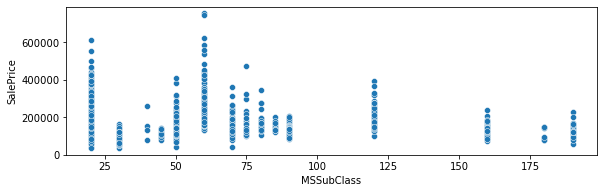

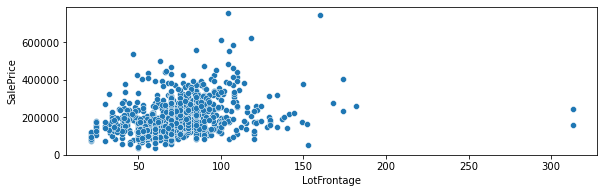

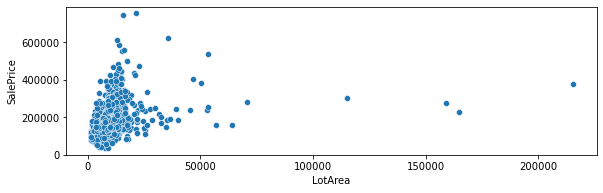

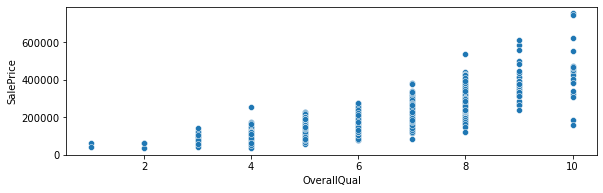

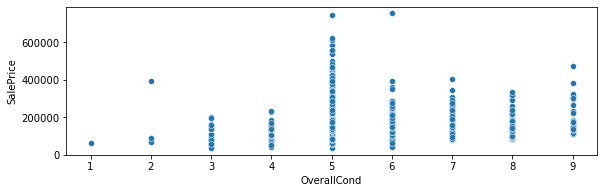

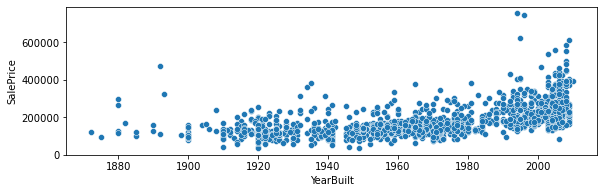

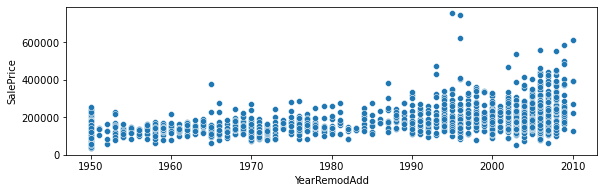

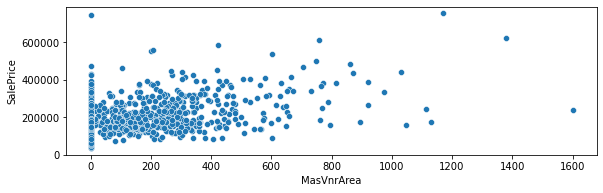

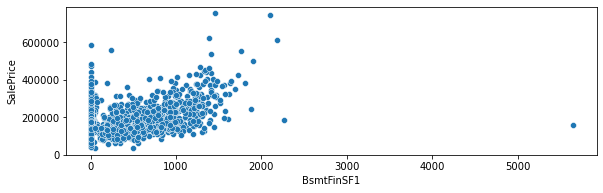

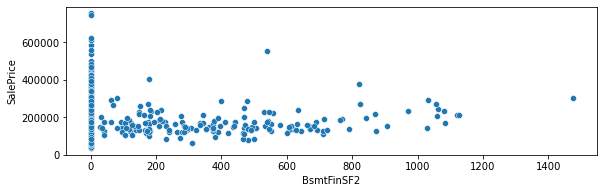

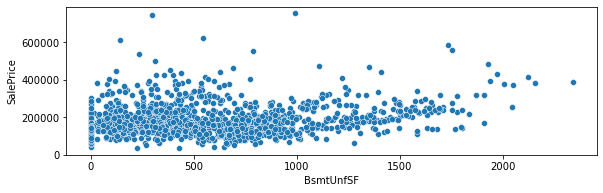

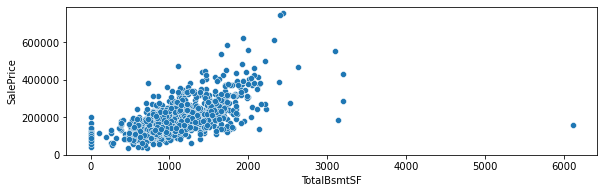

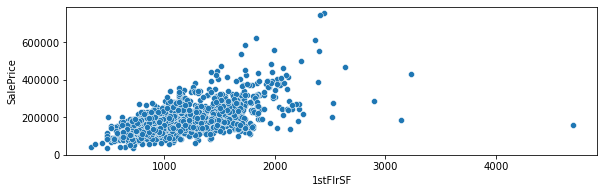

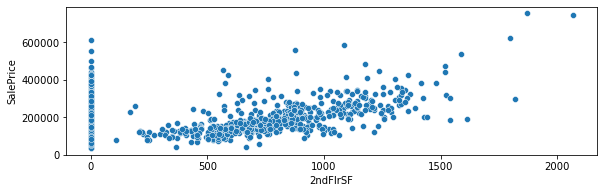

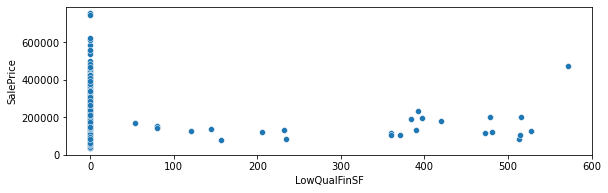

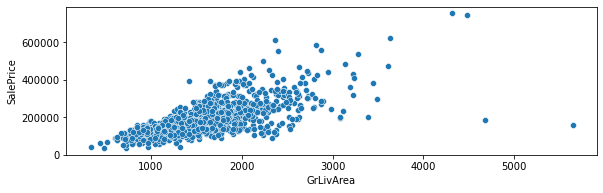

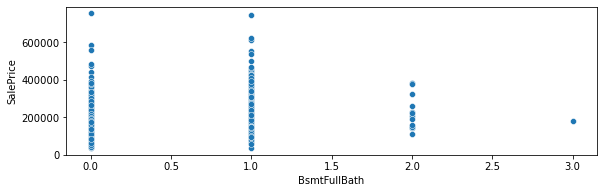

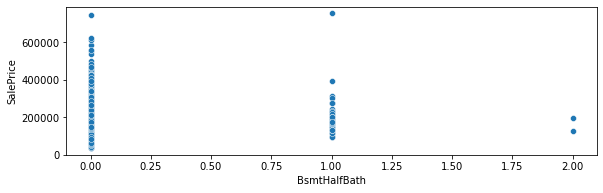

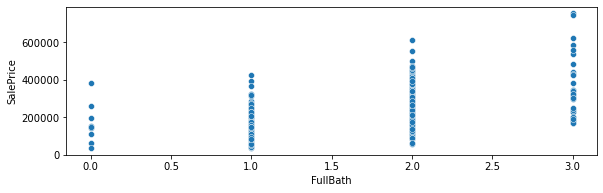

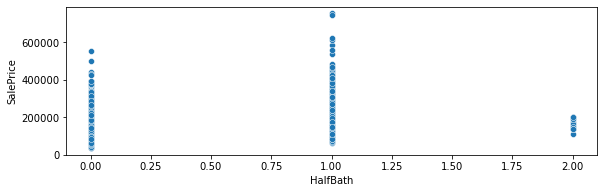

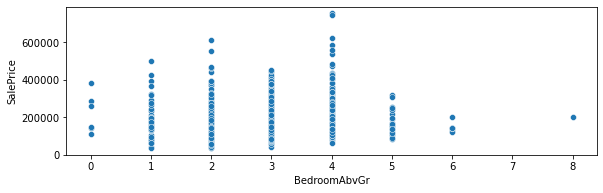

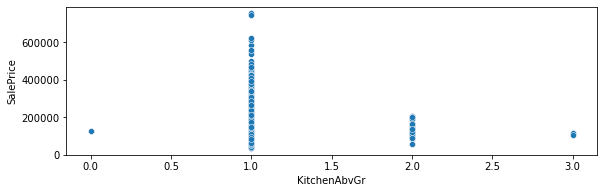

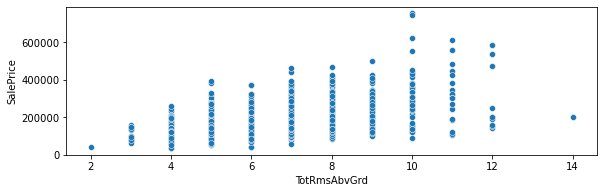

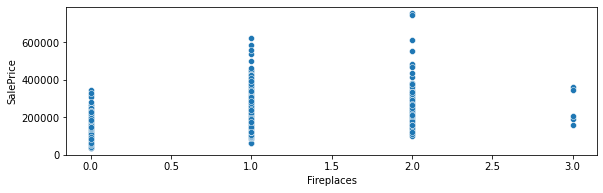

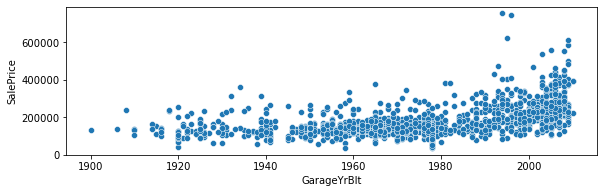

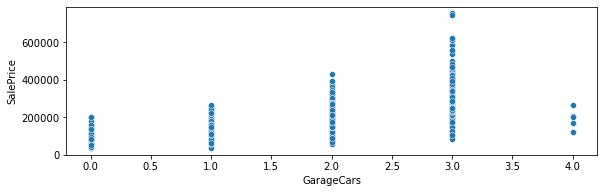

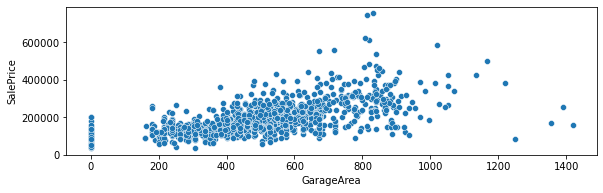

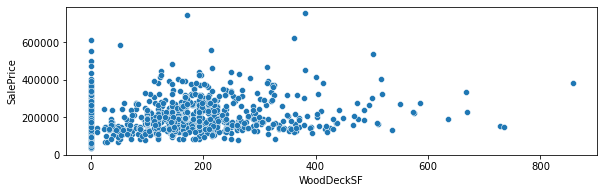

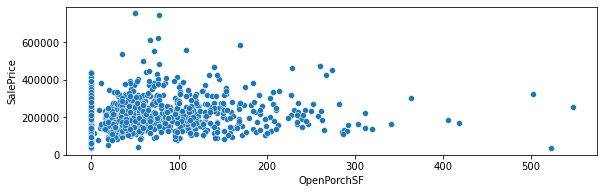

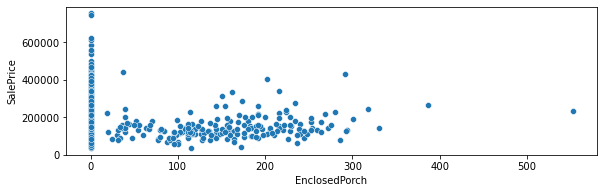

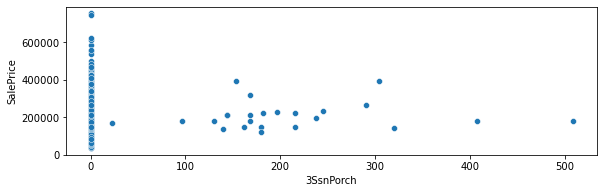

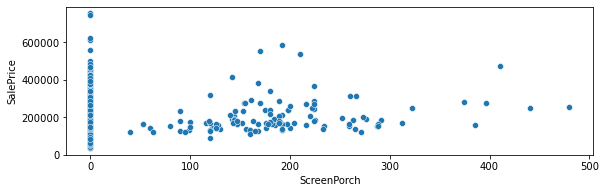

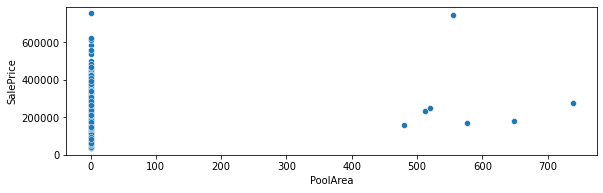

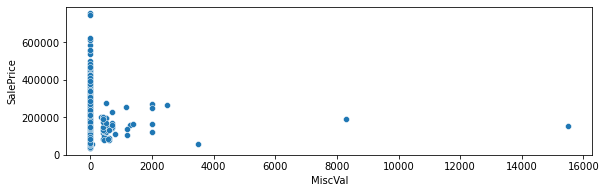

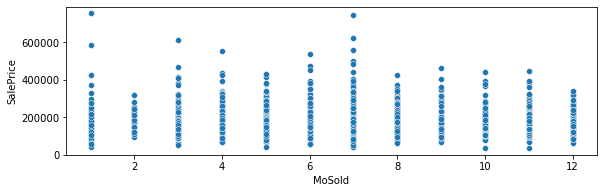

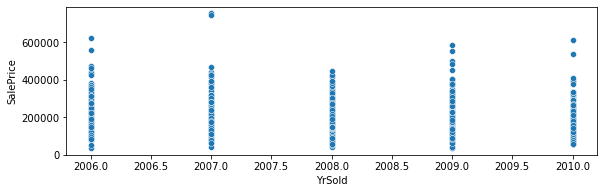

In [106]:
for elm in train:
    if train[elm].dtype != 'object' and elm != 'SalePrice':
        fig = plt.figure(figsize=(16,5))
        fig.add_subplot(2,2,1)
        sns.scatterplot(train[elm], train['SalePrice'])
        plt.tight_layout()
    pass
pass

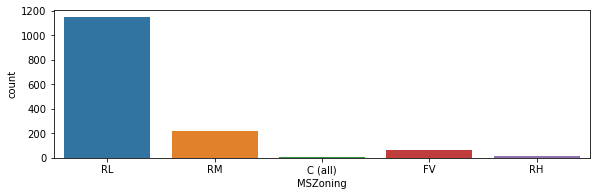

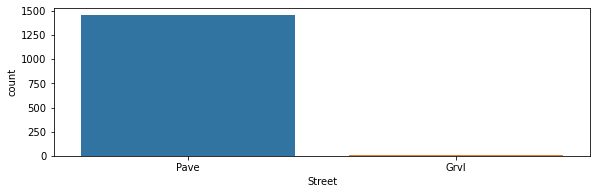

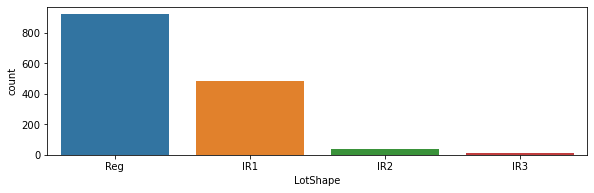

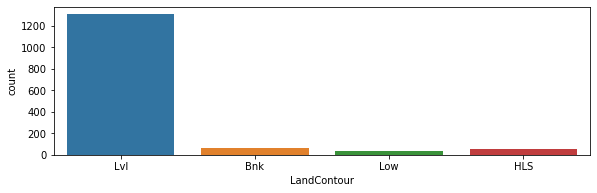

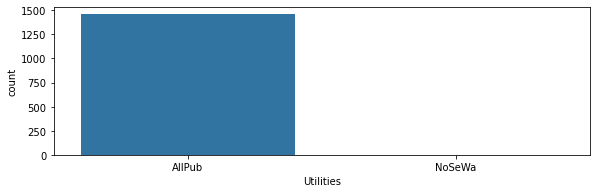

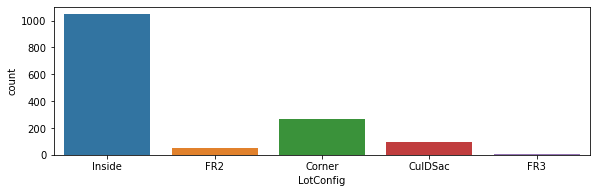

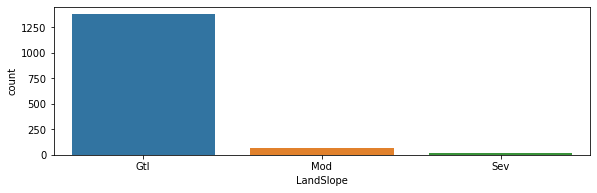

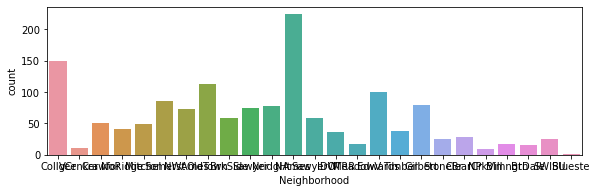

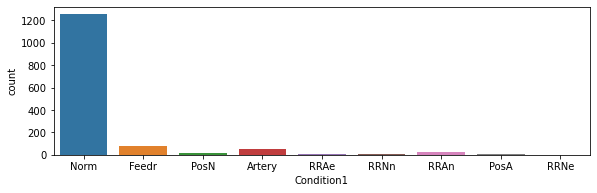

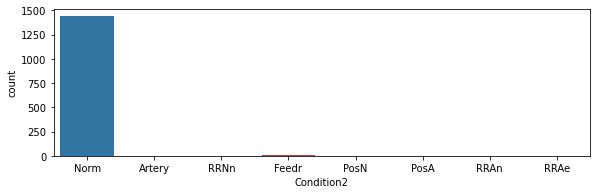

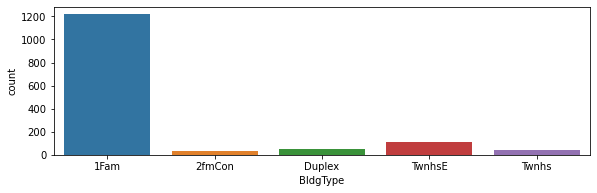

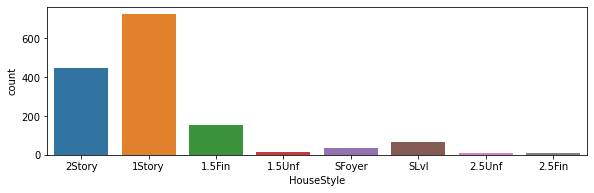

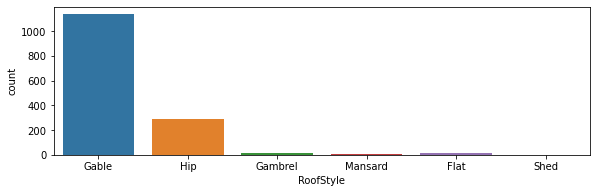

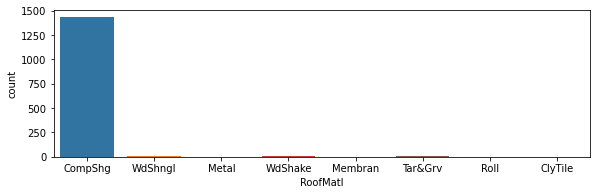

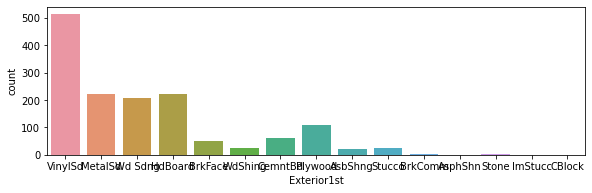

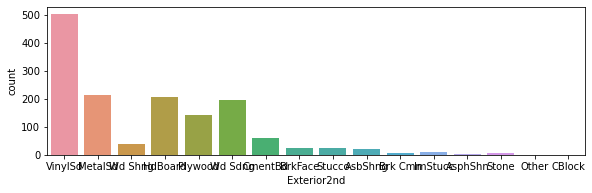

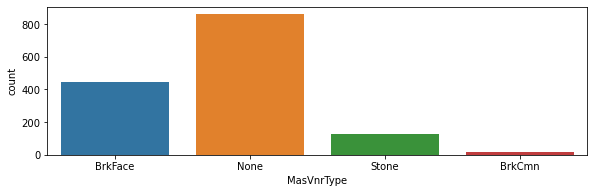

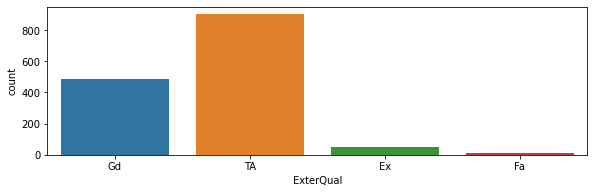

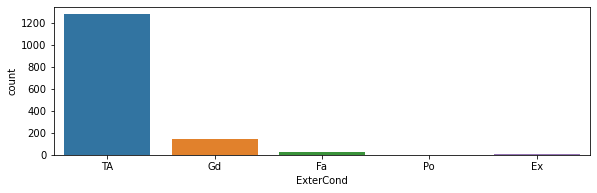

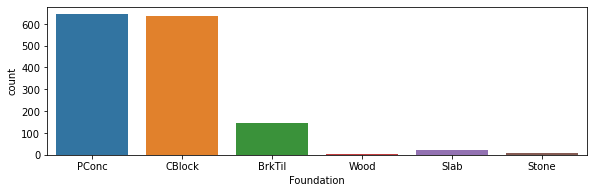

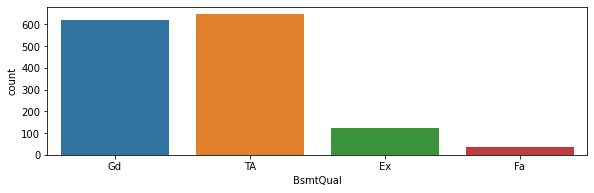

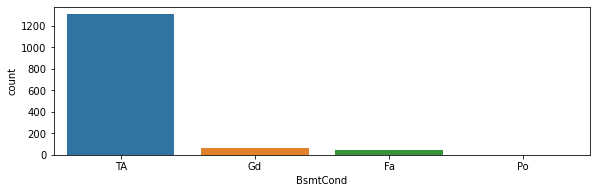

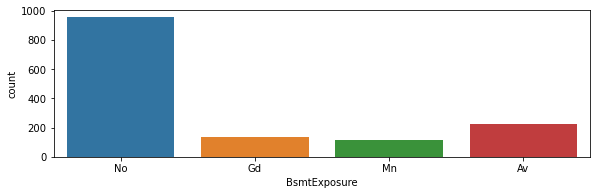

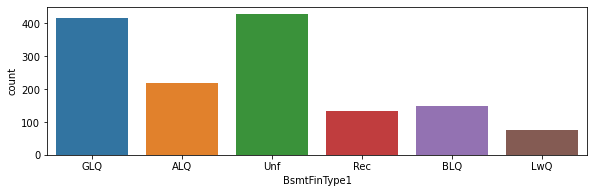

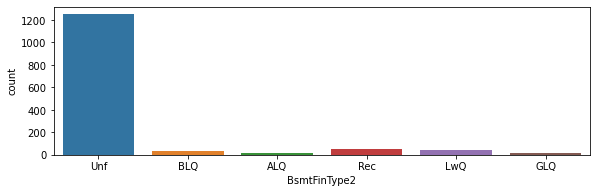

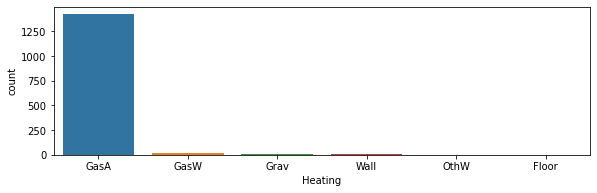

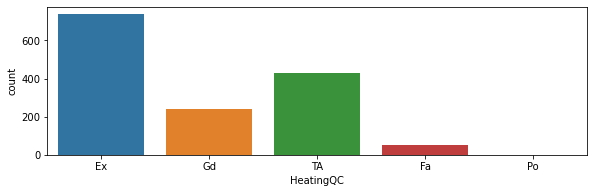

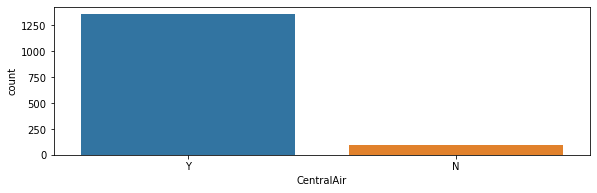

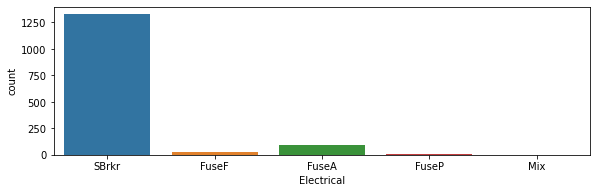

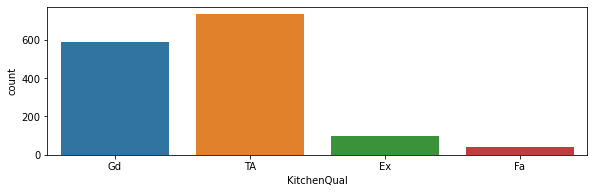

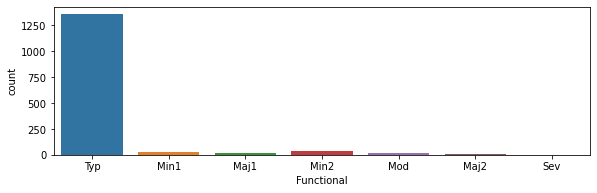

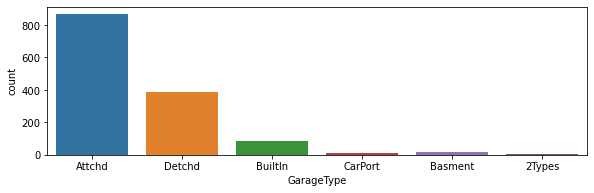

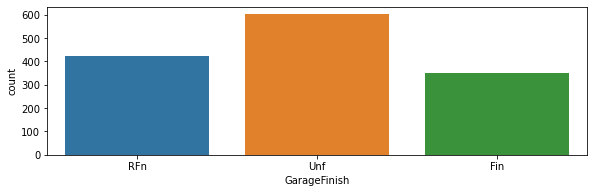

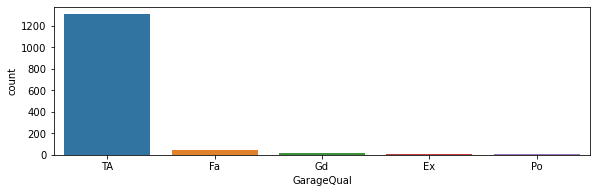

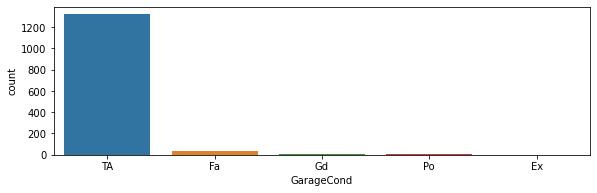

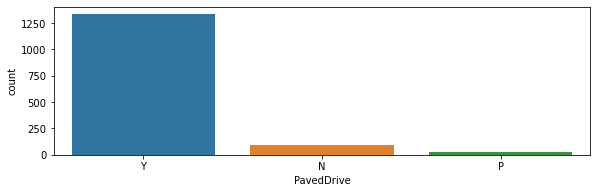

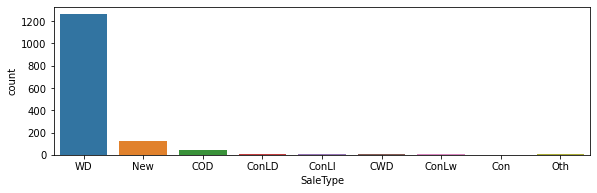

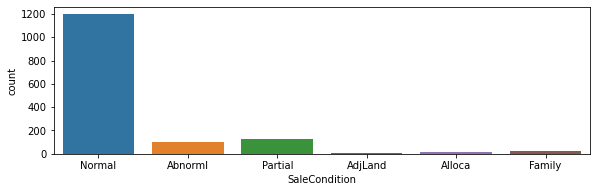

In [107]:
for elm in train:
    if train[elm].dtype == 'object':
        fig = plt.figure(figsize=(16,5))
        fig.add_subplot(2,2,1)
        sns.countplot(train[elm])
        plt.tight_layout()
    pass
pass

# Transforming the data

In [108]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [109]:
categorical_features = ['']
for elm in train:
    if train[elm].dtype == 'object':
        try:
            obj = LabelEncoder()
            train[elm] = obj.fit_transform(train[elm])
        except:
            train = train.drop(elm, axis = 1)
            print("Exception in ",elm)
        pass
    pass
pass    

Exception in  MasVnrType
Exception in  BsmtQual
Exception in  BsmtCond
Exception in  BsmtExposure
Exception in  BsmtFinType1
Exception in  BsmtFinType2
Exception in  Electrical
Exception in  GarageType
Exception in  GarageFinish
Exception in  GarageQual
Exception in  GarageCond


In [110]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1457,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1458,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500


# Descriptive Statistics

In [111]:
train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,3.028767,70.041096,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,42.300571,0.632017,22.024031,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,50.000000,3.000000,70.000000,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,70.000000,3.000000,79.000000,11601.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


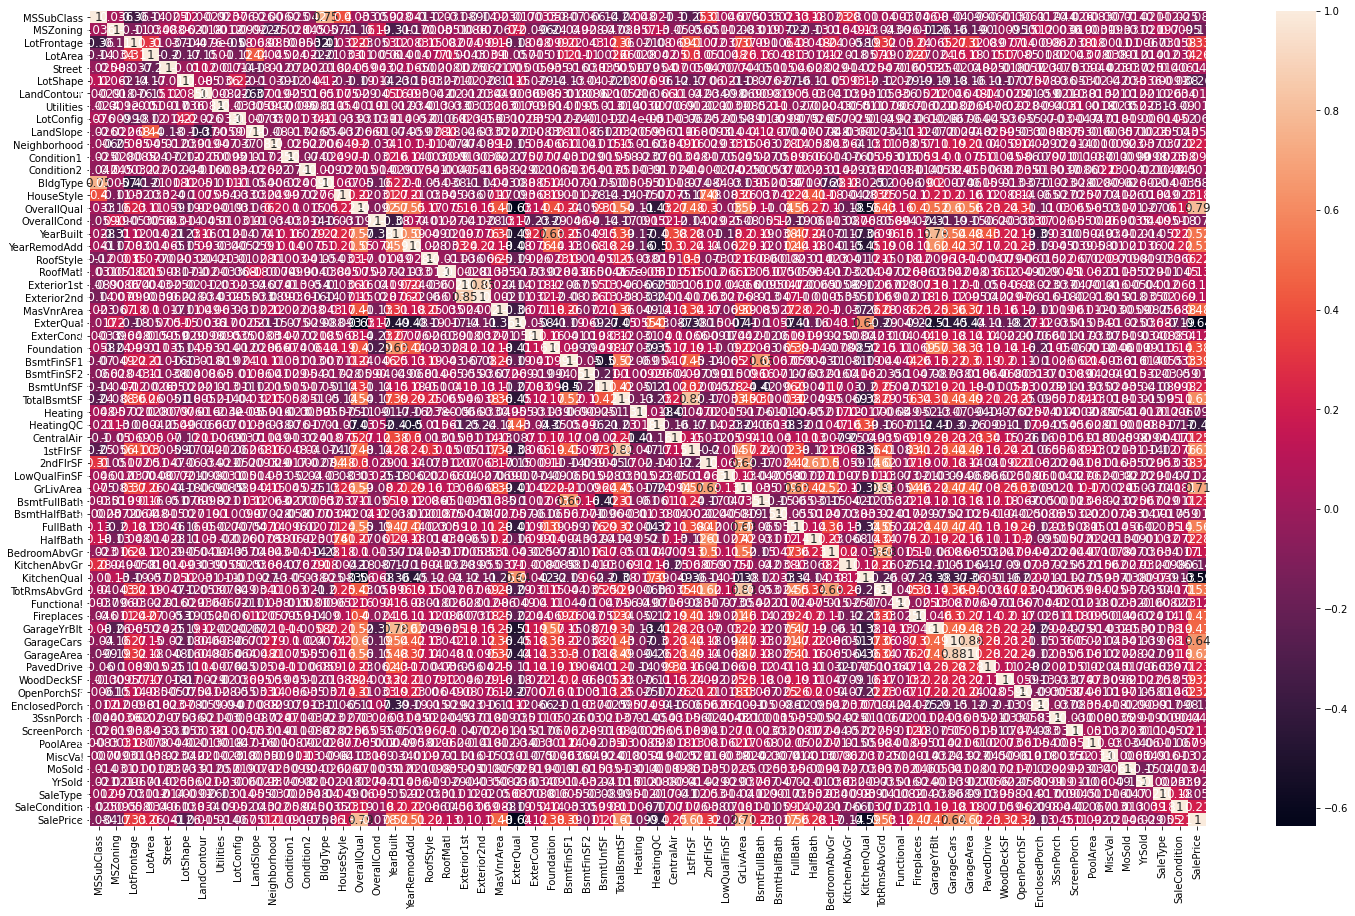

In [112]:
corr = train.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values,annot = True, annot_kws = {'size':12})
heat_map = plt.gcf()
heat_map.set_size_inches(25,15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [113]:
dict(train.var())

{'MSSubClass': 1789.338306402389,
 'MSZoning': 0.3994460457998084,
 'LotFrontage': 485.05793985372,
 'LotArea': 99625649.6503417,
 'Street': 0.004095505459734975,
 'LotShape': 1.9857211263108936,
 'LandContour': 0.5007910278197683,
 'Utilities': 0.0006849315068492968,
 'LotConfig': 2.63294243570848,
 'LandSlope': 0.07630437436037239,
 'Neighborhood': 36.16500840320307,
 'Condition1': 0.7543184954979317,
 'Condition2': 0.06710169284647924,
 'BldgType': 1.435868065009828,
 'HouseStyle': 3.6530857126761105,
 'OverallQual': 1.9126794482991696,
 'OverallCond': 1.2383223637883065,
 'YearBuilt': 912.2154126019891,
 'YearRemodAdd': 426.2328222558135,
 'RoofStyle': 0.6972213093975094,
 'RoofMatl': 0.3589529326711022,
 'Exterior1st': 10.22502558517263,
 'Exterior2nd': 12.535638033180895,
 'MasVnrArea': 32605.206923018468,
 'ExterQual': 0.4816284375674838,
 'ExterCond': 0.5355417953749476,
 'Foundation': 0.5218525542922015,
 'BsmtFinSF1': 208025.46846873628,
 'BsmtFinSF2': 26023.90777883106,
 'Bs

# Feature Selections

In [114]:
chi2(train.drop('SalePrice', axis = 1), train.SalePrice)

(array([1.92812326e+04, 1.13803139e+02, 5.06681533e+03, 1.01149714e+07,
        3.65060135e+00, 8.02972897e+02, 1.24357379e+02, 2.42333333e+02,
        5.64633630e+02, 8.89793781e+02, 2.19426711e+03, 2.12616289e+02,
        2.73364812e+01, 1.95147825e+03, 8.12887720e+02, 3.78077635e+02,
        1.54978681e+02, 4.43852824e+02, 1.88882164e+02, 3.56053615e+02,
        2.29029740e+02, 6.96025906e+02, 8.08619925e+02, 2.85750561e+05,
        2.09777237e+02, 8.77695965e+01, 3.02333392e+02, 3.99985064e+05,
        3.68882725e+05, 2.74751155e+05, 1.74706463e+05, 6.76132408e+01,
        1.48314493e+03, 5.38023349e+01, 1.23809831e+05, 4.64884066e+05,
        2.44880957e+05, 1.96850058e+05, 4.48324316e+02, 5.97224646e+02,
        1.95208250e+02, 5.20704617e+02, 1.71586739e+02, 2.84908343e+01,
        3.03823780e+02, 3.60000495e+02, 9.75197544e+01, 5.70507272e+02,
        2.55201750e+02, 3.24554492e+02, 9.61840540e+04, 9.32892554e+01,
        1.29833849e+05, 7.43625674e+04, 9.88865653e+04, 1.549360

In [115]:
selector = SelectKBest(chi2, k = 10)
selector.fit(train.drop('SalePrice', axis = 1), train.SalePrice)

SelectKBest(score_func=<function chi2 at 0x0000022A96F1D4C0>)

In [116]:
selector.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True,  True, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False])

In [117]:
selected_features = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PoolArea', 'MiscVal']

# Splitting data

In [118]:
x_train, x_test, y_train, y_test = train_test_split(train[selected_features], train.SalePrice, test_size = 0.2, random_state = 42)

# Models Selection

In [124]:
models = [SVR(), LinearRegression(), SGDRegressor()]

In [135]:
for model in models:
    trainning_score = cross_val_score(model, x_train, y_train, cv = 5).mean()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    print("{}".format(str(model)))
    print("Trainning score:{}".format(trainning_score))
    print("MAE:{}".format(mean_absolute_error(y_test, pred)))
    print("MSE score:{}".format(mean_squared_error(y_test, pred)))
    print("_"*120)
    pass
pass

SVR()
Trainning score:-0.05217163101606874
MAE:59556.21728414973
MSE score:7859213349.839996
________________________________________________________________________________________________________________________
LinearRegression()
Trainning score:0.5616581641225522
MAE:30682.174505030813
MSE score:2084958577.5243487
________________________________________________________________________________________________________________________
SGDRegressor()
Trainning score:-1.6307763922647258e+24
MAE:2.7280268536299604e+16
MSE score:1.0478284815475752e+33
________________________________________________________________________________________________________________________


# Neural Network for Regression

In [131]:
def build_model(dense_dimension = 200):
    model = Sequential()
    model.add(Dense(dense_dimension,  activation='relu'))
    model.add(Dense(dense_dimension,  activation='relu'))
    model.add(Dense(dense_dimension, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='Adam',loss='mean_squared_error')
    return model

model = build_model()
model.fit(x=x_train, y=y_train, batch_size=200, epochs=500)

Epoch 1/500
6/6 [==============================] - 2s 3ms/step - loss: 38047162953.1429
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 35450640091.4286
Epoch 3/500
6/6 [==============================] - 0s 3ms/step - loss: 30819086043.4286
Epoch 4/500
6/6 [==============================] - 0s 3ms/step - loss: 23693838921.1429
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 18232598966.8571
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 14641131666.2857
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 16746888923.4286
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 15843704100.5714
Epoch 9/500
6/6 [==============================] - 0s 3ms/step - loss: 14426525110.8571
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 14710073197.7143
Epoch 11/500
6/6 [==============================] - 0s 3ms/step - loss: 14729295433.1429
Epoch 12/500
6/6 [============

6/6 [==============================] - 0s 3ms/step - loss: 2246882176.0000
Epoch 95/500
6/6 [==============================] - 0s 3ms/step - loss: 1926531803.4286
Epoch 96/500
6/6 [==============================] - 0s 3ms/step - loss: 2305624374.8571
Epoch 97/500
6/6 [==============================] - 0s 3ms/step - loss: 2729406683.4286
Epoch 98/500
6/6 [==============================] - 0s 3ms/step - loss: 2710030153.1429
Epoch 99/500
6/6 [==============================] - 0s 3ms/step - loss: 2772760612.5714
Epoch 100/500
6/6 [==============================] - 0s 3ms/step - loss: 2043236571.4286
Epoch 101/500
6/6 [==============================] - 0s 3ms/step - loss: 2548172288.0000
Epoch 102/500
6/6 [==============================] - 0s 3ms/step - loss: 2740938678.8571
Epoch 103/500
6/6 [==============================] - 0s 3ms/step - loss: 2181925430.8571
Epoch 104/500
6/6 [==============================] - 0s 3ms/step - loss: 2160066322.2857
Epoch 105/500
6/6 [=====================

6/6 [==============================] - 0s 3ms/step - loss: 1921161746.2857
Epoch 278/500
6/6 [==============================] - 0s 3ms/step - loss: 1741744164.5714
Epoch 279/500
6/6 [==============================] - 0s 3ms/step - loss: 2088576749.7143
Epoch 280/500
6/6 [==============================] - 0s 3ms/step - loss: 2088338340.5714
Epoch 281/500
6/6 [==============================] - 0s 3ms/step - loss: 1741337965.7143
Epoch 282/500
6/6 [==============================] - 0s 3ms/step - loss: 2542853851.4286
Epoch 283/500
6/6 [==============================] - 0s 2ms/step - loss: 2085864484.5714
Epoch 284/500
6/6 [==============================] - 0s 3ms/step - loss: 1853721636.5714
Epoch 285/500
6/6 [==============================] - 0s 3ms/step - loss: 2105241069.7143
Epoch 286/500
6/6 [==============================] - 0s 3ms/step - loss: 1808715081.1429
Epoch 287/500
6/6 [==============================] - 0s 3ms/step - loss: 2238815579.4286
Epoch 288/500
6/6 [================

6/6 [==============================] - 0s 3ms/step - loss: 1850269714.2857
Epoch 461/500
6/6 [==============================] - 0s 3ms/step - loss: 1545316571.4286
Epoch 462/500
6/6 [==============================] - 0s 3ms/step - loss: 1626453211.4286
Epoch 463/500
6/6 [==============================] - 0s 3ms/step - loss: 2118742144.0000
Epoch 464/500
6/6 [==============================] - 0s 3ms/step - loss: 1919839597.7143
Epoch 465/500
6/6 [==============================] - 0s 3ms/step - loss: 1693426413.7143
Epoch 466/500
6/6 [==============================] - 0s 3ms/step - loss: 2146159122.2857
Epoch 467/500
6/6 [==============================] - 0s 3ms/step - loss: 2192496841.1429
Epoch 468/500
6/6 [==============================] - 0s 3ms/step - loss: 1921988736.0000
Epoch 469/500
6/6 [==============================] - 0s 3ms/step - loss: 1761695360.0000
Epoch 470/500
6/6 [==============================] - 0s 3ms/step - loss: 1819449563.4286
Epoch 471/500
6/6 [================

In [132]:
y_pred = model.predict(x_test)

In [134]:
print('MAE:', mean_absolute_error(y_test, y_pred))  
print('MSE:', mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 29005.32264019692
MSE: 1945247165.0165823
RMSE: 44104.956240955304


In [1]:
print("The end")

The end
